<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/03_04_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Review Classifier
This notebook serves as a challenge to implement and explore LSTM and Convolution model over the new Yelp review dataset. You have to fill up all the blanks with the hyperparameters that helps you get the best accuracy and loss.

In [ ]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.4.1


## Downloading the TensorFlow `yelp_popularity_review` dataset

> Make sure tensorflow_datasets is installed

In [ ]:
##load the yelp reviews dataset
data, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)

In [ ]:
train_data, test_data = data['train'], data['test']

train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [ ]:
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())


train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
##define the parameters for tokenizing and padding
vocab_size = ____
embedding_dim = __
max_length = ____
padding_type = 'post'
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Explore the LSTM & CNN model with the following layers:
1. Embedding layer
2. Try two bidirectional LSTM layers or a Conv1D layer or both.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.____(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.____(tf.keras.layers.LSTM(____, return_sequences=True)),
    tf.keras.layers.____(tf.keras.layers.LSTM(__)),
    tf.keras.layers.____(32, activation='relu'),
    tf.keras.layers.____(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 256)          164864    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 653,377
Trainable params: 653,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
17500/17500 [==============================] - 428s 24ms/step - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.2357 - val_accuracy: 0.9419
Epoch 2/10
17500/17500 [==============================] - 427s 24ms/step - loss: 0.0277 - accuracy: 0.9903 - val_loss: 0.2541 - val_accuracy: 0.9415
Epoch 3/10
17500/17500 [==============================] - 415s 24ms/step - loss: 0.0252 - accuracy: 0.9914 - val_loss: 0.2749 - val_accuracy: 0.9383
Epoch 4/10
17500/17500 [==============================] - 411s 23ms/step - loss: 0.0236 - accuracy: 0.9917 - val_loss: 0.2664 - val_accuracy: 0.9387
Epoch 5/10
17500/17500 [==============================] - 442s 25ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.2918 - val_accuracy: 0.9378
Epoch 6/10
17500/17500 [==============================] - 429s 25ms/step - loss: 0.0206 - accuracy: 0.9926 - val_loss: 0.2862 - val_accuracy: 0.9400
Epoch 7/10
17500/17500 [==============================] - 428s 24ms/step - loss: 0.0195 - accuracy: 0.9932

## Visualise the accuracy and loss

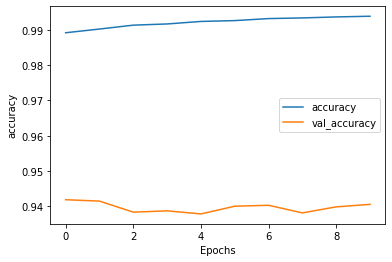

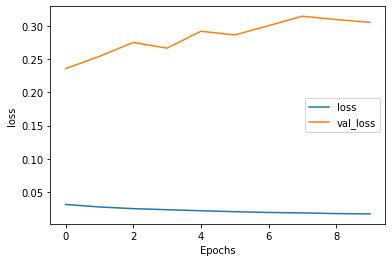

In [ ]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

## Classify new reviews

In [ ]:
sentence = ["the restaurant served a delicious pasta", "the restaurant didn't have a decent ambience"]
sequences = tokenizer.____(sentence)
padded = ____(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.____(padded))

[[0.64638937]
 [0.57805914]]
